In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Each image is of shape 28 * 28-> num features = 18 * 28
#10 different classes
num_features = 28 * 28
num_classes = 10

**Load and Visualize data**

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11493376/11490434 [==============================] - 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000


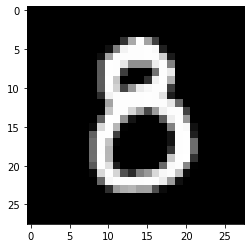

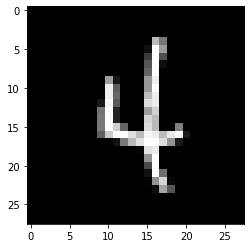

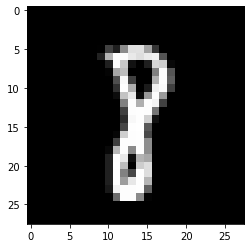

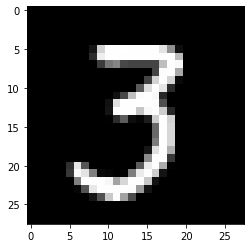

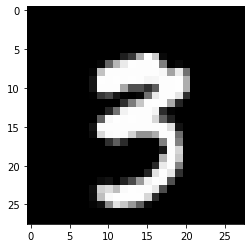

In [4]:
for i in range(5):
  random_image = random.choice(x_train)
  random_image = random_image.reshape(28, 28)
  plt.imshow(random_image, cmap='gray')
  plt.show()

In [5]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(64).prefetch(1)

In [6]:
'''
W = tf.Variable(tf.ones(shape=(num_feature, num_class)), name = "weight", dtype="float32")
b = tf.Variable(tf.zeros(shape=(num_class, 1)), name = "bias", dtype="float32")
'''
W = tf.Variable(tf.random.uniform([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")
print(W.numpy().shape)
print(b.numpy().shape)

def logistic_regression(x):
  #x is matrix of shape batch_size * num_feature, W is matrix of shape num_feature * num_class
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy_loss(y_pred, y_true):
  y_true = tf.one_hot(y_true, depth=num_classes)
  temp = y_true * tf.math.log(y_pred)
  return tf.reduce_mean(-tf.reduce_sum(temp, 1))

def accuracy(y_true, y_pred):
  #y_true and y_pred are matrix of shape (num_examples * num_class)
  #return tf.reduce_mean(tf.equal(tf.argmax(y_pred, axis = 1), tf.cast(y_true, tf.int64)))
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam()


(784, 10)
(10,)


In [7]:
def optimization(x, y):
  with tf.GradientTape() as g:
    pred = logistic_regression(x)
    loss = cross_entropy_loss(pred, y)

  gradients = g.gradient(loss, [W, b])
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
loss_history = []
steps = []
for step, (batch_x, batch_y) in enumerate(train_data.take(1000), 1):
  optimization(batch_x, batch_y)

  if step % 50 == 0:
    steps.append(step)
    pred = logistic_regression(batch_x)
    loss = cross_entropy_loss(pred, batch_y)
    loss_history.append(loss)
    acc = accuracy(batch_y, pred)
    print("Step: ", step, " Accuracy: ", acc.numpy(), " Loss: ", loss.numpy())

Step:  50  Accuracy:  0.25  Loss:  2.4903564
Step:  100  Accuracy:  0.390625  Loss:  1.8807482
Step:  150  Accuracy:  0.53125  Loss:  1.4599229
Step:  200  Accuracy:  0.640625  Loss:  1.4518019
Step:  250  Accuracy:  0.765625  Loss:  0.9164357
Step:  300  Accuracy:  0.75  Loss:  0.69311506
Step:  350  Accuracy:  0.859375  Loss:  0.5037439
Step:  400  Accuracy:  0.75  Loss:  0.85331553
Step:  450  Accuracy:  0.84375  Loss:  0.5055267
Step:  500  Accuracy:  0.765625  Loss:  0.7032773
Step:  550  Accuracy:  0.796875  Loss:  0.56349593
Step:  600  Accuracy:  0.84375  Loss:  0.5188427
Step:  650  Accuracy:  0.875  Loss:  0.49536774
Step:  700  Accuracy:  0.78125  Loss:  0.69173115
Step:  750  Accuracy:  0.734375  Loss:  0.61154133
Step:  800  Accuracy:  0.859375  Loss:  0.36828563
Step:  850  Accuracy:  0.84375  Loss:  0.42692032
Step:  900  Accuracy:  0.84375  Loss:  0.43601772
Step:  950  Accuracy:  0.890625  Loss:  0.34020546
Step:  1000  Accuracy:  0.828125  Loss:  0.4527393


**Loss vs Steps**

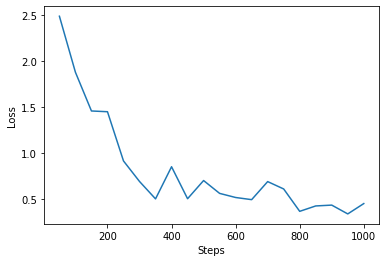

In [9]:
plt.plot(steps, loss_history)
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.show()

**Make predictions on test data**

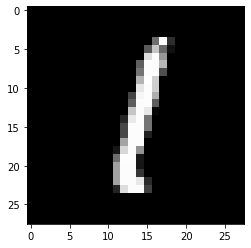

Prediction:  [1]


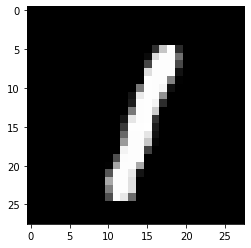

Prediction:  [1]


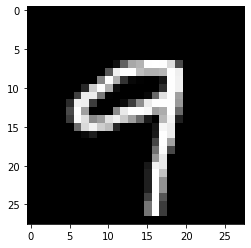

Prediction:  [9]


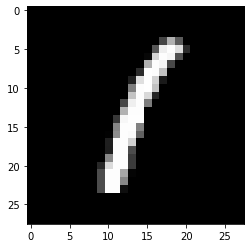

Prediction:  [1]


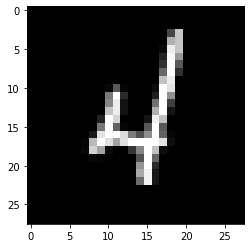

Prediction:  [4]


In [10]:
test_images = []
for i in range(5):
  random_image = random.choice(x_test)
  random_image = random_image.reshape([28, 28])
  plt.imshow(random_image, cmap='gray')
  plt.show()
  random_image = random_image.reshape(1, 28 * 28)
  prediction = logistic_regression(random_image)
  print("Prediction: ", tf.argmax(prediction, axis = 1).numpy())
  

**Check what images we got wrong**

In [11]:
test_predictions = logistic_regression(x_test)
test_predictions = np.argmax(test_predictions, axis = 1)

In [12]:
a = np.where(test_predictions != y_test)[0]
mistakes = x_test[a[0:5]]

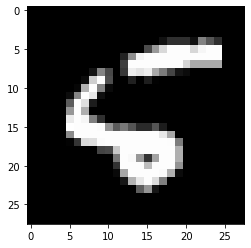

Correct label:  5
Predicted label:  6


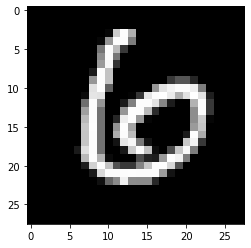

Correct label:  6
Predicted label:  8


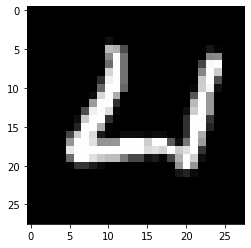

Correct label:  4
Predicted label:  0


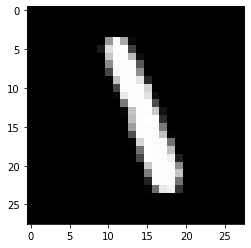

Correct label:  1
Predicted label:  3


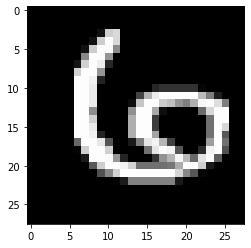

Correct label:  6
Predicted label:  2


In [13]:
for i in range(5):
  #random_image = random.choice(x_test)
  image = mistakes[i].reshape([28, 28])
  plt.imshow(image, cmap='gray')
  plt.show()
  print("Correct label: ", y_test[a[i]])
  print("Predicted label: ", test_predictions[a[i]])

**Comments**

Logistic regression might not be the best tool for this task. Even though the performance is relatively good, the algorithm is not sophisticated enough. Using a more complicated network such as DNN or CNN will help